In [1]:
#Angel Favian Minga
#16 de julio 2020
import numpy as np
import random as rnd
import pandas as pd
import matplotlib as plt1
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#jugadores
jug1="Angel"
jug2="Luis"

#instancias
i1=0.5  #la otra no la escribo ya que se solo hay dos rangos

#probabilidad
C1=0#'c'
C2=1#'s'

size=50; #tamaño
size1=100; #tamaño
size2=150; #tamaño

In [3]:
#gnerador num aleatorios
#print(random.randrange(10))
def gen_num():
    return rnd.random()
#generar aleatorio entre 0 y 1 para cara o sello segun el jugador
def gen_dist_uni():
    x=rnd.random()
    if x>=i1:
        return 1
    else:
        return 0

In [4]:
def get_label(X):
    if X>0 and X<=i1:
        return C1
    if X>i1 and X<=1:
        return C2

# se crea una matriz con elementos cero

In [5]:
# [0] Jugador1 [1] jugador2 [2]T1  [3]T2  [4]T3   [5]j1 loss=0/win=1  [6]j2 loss=0/win=1 
md=np.zeros((size,7))

Prueba con 50 datos

In [6]:
# [0] Jugador1 [1] jugador2 [2]T1  [3]T2  [4]T3   [5]j1 loss=0/win=1  [6]j2 loss=0/win=1 
       #0=cara     1=sello
for i in range(size):
    cs=gen_dist_uni()
    for j in range(5):
        if j==0:
            md[i,j]=cs
        else:
            if j==1:
                md[i,j]=abs(cs-1)
            else:
                md[i,j]=get_label(gen_num())

In [7]:
#md

# evaluacion de interaccines

In [8]:
                    #0  1    0
def verifica_gana(val1,val2,val3):
    if val1==val3: #md[i,2]
        return 1 #md[i,0]
    if val2==val3:
        return 0 #md[i,1]

In [9]:
def cara_sello(dato):
    if dato==0:
        return "C" #cara
    else:
        return "S" #sello

In [10]:
#               1    0
def asigna_gana(val,c_s,i):
    if val==0:
        md[i,5]=0
        md[i,6]=1
    else:
        md[i,5]=1
        md[i,6]=0

In [11]:
#verifica quien gana o pierde
for i in range (size):
    #md[i,0]=Jugador 1
    #md[i,1]=Jugador 2 
    #[i,0]Jugador1 [i,1]Jugador2 [i,2]T1 [i,3]T2 [i,4]T3  [i,5]J1 loss/win [i,6]J2 loss/win
    if  md[i,2]==md[i,3] and md[i,2]==md[i,4]:
        #1 o 0                  A 0     L1       0
        valor=verifica_gana(md[i,0],md[i,1],md[i,2])
        #1              1    0
        asigna_gana(valor,md[i,0],i)
    elif md[i,2]==md[i,3] or md[i,2]==md[i,4]:
        valor=verifica_gana(md[i,0],md[i,1],md[i,2])
        asigna_gana(valor,md[i,0],i)
    elif md[i,3]==md[i,4]:
        valor=verifica_gana(md[i,0],md[i,1],md[i,3])
        asigna_gana(valor,md[i,0],i)

In [12]:
md
#    A   L   T1  T2  T3  A   L

array([[1., 0., 1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 1., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 1., 0., 1.],
       [1., 0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 1., 0., 1.],
       [1., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 1., 0., 0., 0., 1.],
       [1., 0., 1., 1., 1., 1., 0.],
       [1., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0., 1.],
       [0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0.],
 

In [13]:
df=pd.DataFrame(md)

In [14]:
df
# A   L   T1  T2  T3  A   L

0    1    2    3    4    5    6
0   1.0  0.0  1.0  1.0  1.0  1.0  0.0
1   1.0  0.0  1.0  1.0  1.0  1.0  0.0
2   1.0  0.0  0.0  0.0  1.0  0.0  1.0
3   0.0  1.0  1.0  0.0  1.0  0.0  1.0
4   1.0  0.0  1.0  1.0  0.0  1.0  0.0
5   0.0  1.0  0.0  1.0  1.0  0.0  1.0
6   1.0  0.0  0.0  0.0  0.0  0.0  1.0
7   0.0  1.0  0.0  1.0  1.0  0.0  1.0
8   1.0  0.0  0.0  0.0  1.0  0.0  1.0
9   1.0  0.0  1.0  0.0  0.0  0.0  1.0
10  0.0  1.0  0.0  0.0  1.0  1.0  0.0
11  0.0  1.0  1.0  0.0  0.0  1.0  0.0
12  1.0  0.0  0.0  0.0  0.0  0.0  1.0
13  1.0  0.0  1.0  0.0  1.0  1.0  0.0
14  0.0  1.0  0.0  1.0  1.0  0.0  1.0
15  1.0  0.0  1.0  0.0  0.0  0.0  1.0
16  1.0  0.0  0.0  0.0  0.0  0.0  1.0
17  0.0  1.0  1.0  0.0  0.0  1.0  0.0
18  1.0  0.0  0.0  0.0  1.0  0.0  1.0
19  1.0  0.0  0.0  1.0  0.0  0.0  1.0
20  1.0  0.0  0.0  0.0  1.0  0.0  1.0
21  1.0  0.0  1.0  0.0  0.0  0.0  1.0
22  1.0  0.0  1.0  1.0  1.0  1.0  0.0
23  1.0  0.0  1.0  0.0  0.0  0.0  1.0
24  0.0  1.0  0.0  1.0  1.0  0.0  1.0
25  0.0  1.0  0.0  0.0  1.0  1.0  0.0
26  0.0  1.0  0.0  1.0  0.0  1.0  0.0
27  0.0  1.0  1.0  0.0  0.0  1.0  0.0
28  0.0  1.0  1.0  0.0  0.0  1.0  0.0
29  0.0  1.0  1.0  0.0  1.0  0.0  1.0
30  1.0  0.0  1.0  1.0  0.0  1.0  0.0
31  0.0  1.0  1.0  0.0  0.0  1.0  0.0
32  0.0  1.0  1.0  1.0  0.0  0.0  1.0
33  1.0  0.0  0.0  1.0  1.0  1.0  0.0
34  1.0  0.0  0.0  1.0  1.0  1.0  0.0
35  0.0  1.0  0.0  0.0  1.0  1.0  0.0
36  1.0  0.0  0.0  1.0  0.0  0.0  1.0
37  0.0  1.0  0.0  1.0  0.0  1.0  0.0
38  1.0  0.0  0.0  1.0  1.0  1.0  0.0
39  1.0  0.0  1.0  0.0  0.0  0.0  1.0
40  0.0  1.0  1.0  0.0  1.0  0.0  1.0
41  1.0  0.0  1.0  1.0  0.0  1.0  0.0
42  0.0  1.0  0.0  1.0  1.0  0.0  1.0
43  1.0  0.0  1.0  1.0  0.0  1.0  0.0
44  1.0  0.0  0.0  1.0  0.0  0.0  1.0
45  0.0  1.0  1.0  1.0  1.0  0.0  1.0
46  0.0  1.0  1.0  1.0  1.0  0.0  1.0
47  1.0  0.0  0.0  0.0  1.0  0.0  1.0
48  1.0  0.0  1.0  0.0  0.0  0.0  1.0
49  0.0  1.0  0.0  1.0  0.0  1.0  0.0

Prueba con 100 datos 

In [15]:
# [0] Jugador1 [1] jugador2 [2]T1  [3]T2  [4]T3   [5]j1 loss=0/win=1  [6]j2 loss=0/win=1 
md100=np.zeros((size1,7))

In [16]:
def asigna_gana100(val,c_s,i):
    if val==0:
        md100[i,5]=0
        md100[i,6]=1
    else:
        md100[i,5]=1
        md100[i,6]=0

In [17]:
# [0] Jugador1 [1] jugador2 [2]T1  [3]T2  [4]T3   [5]j1 loss=0/win=1  [6]j2 loss=0/win=1 
       #0=cara     1=sello
for i in range(size1):
    cs=gen_dist_uni()
    for j in range(5):
        if j==0:
            md100[i,j]=cs
        else:
            if j==1:
                md100[i,j]=abs(cs-1)
            else:
                md100[i,j]=get_label(gen_num())

In [18]:
#md100

In [19]:
#verifica quien gana o pierde
for i in range (size1):
    #md[i,0]=Jugador 1
    #md[i,1]=Jugador 2 
    #[i,0]Jugador1 [i,1]Jugador2 [i,2]T1 [i,3]T2 [i,4]T3  [i,5]J1 loss/win [i,6]J2 loss/win
    if  md100[i,2]==md100[i,3] and md100[i,2]==md100[i,4]:
        valor=verifica_gana(md100[i,0],md100[i,1],md100[i,2])
        asigna_gana100(valor,md100[i,0],i)
    elif md100[i,2]==md100[i,3] or md100[i,2]==md100[i,4]:
        valor=verifica_gana(md100[i,0],md100[i,1],md100[i,2])
        asigna_gana100(valor,md100[i,0],i)
    elif md100[i,3]==md100[i,4]:
        valor=verifica_gana(md100[i,0],md100[i,1],md100[i,3])
        asigna_gana100(valor,md100[i,0],i)

In [20]:
df100=pd.DataFrame(md100)

Prueba con 150 datos

In [21]:
# [0] Jugador1 [1] jugador2 [2]T1  [3]T2  [4]T3   [5]j1 loss=0/win=1  [6]j2 loss=0/win=1 
md150=np.zeros((size2,7))

In [22]:
def asigna_gana150(val,c_s,i):
    if val==0:
        md150[i,5]=0
        md150[i,6]=1
    else:
        md150[i,5]=1
        md150[i,6]=0

In [23]:
# [0] Jugador1 [1] jugador2 [2]T1  [3]T2  [4]T3   [5]j1 loss=0/win=1  [6]j2 loss=0/win=1 
       #0=cara     1=sello
for i in range(size2):
    cs=gen_dist_uni()
    for j in range(5):
        if j==0:
            md150[i,j]=cs
        else:
            if j==1:
                md150[i,j]=abs(cs-1)
            else:
                md150[i,j]=get_label(gen_num())

In [24]:
#verifica quien gana o pierde
for i in range (size2):
    #md[i,0]=Jugador 1
    #md[i,1]=Jugador 2 
    #[i,0]Jugador1 [i,1]Jugador2 [i,2]T1 [i,3]T2 [i,4]T3  [i,5]J1 loss/win [i,6]J2 loss/win
    if  md150[i,2]==md150[i,3] and md150[i,2]==md150[i,4]:
        valor=verifica_gana(md150[i,0],md150[i,1],md150[i,2])
        asigna_gana150(valor,md150[i,0],i)
    elif md150[i,2]==md150[i,3] or md150[i,2]==md150[i,4]:
        valor=verifica_gana(md150[i,0],md150[i,1],md150[i,2])
        asigna_gana150(valor,md150[i,0],i)
    elif md150[i,3]==md150[i,4]:
        valor=verifica_gana(md150[i,0],md150[i,1],md150[i,3])
        asigna_gana150(valor,md150[i,0],i)

In [25]:
df150=pd.DataFrame(md150)

In [26]:
total_freq_jugador1 = df[0].sum()
total_freq_jugador2 = df[1].sum()
print("Jugador 1: %s sello" %total_freq_jugador1)
print("Jugador 2: %s sello" %total_freq_jugador2)

Jugador 1: 28.0 sello
Jugador 2: 22.0 sello


In [27]:
total_gana_jugador1= df[5].sum()
total_gana_jugador2= df[6].sum()

print("Jugador %s  gano  %s con datos de 50" %(jug1,total_gana_jugador1))
print("Jugador %s  gano  %s con datos de 50" %(jug2,total_gana_jugador2))

t_gana_j1_100= df100[5].sum()
t_gana_j2_100= df100[6].sum()

print("Jugador %s  gano  %s con datos de 100" %(jug1,t_gana_j1_100))
print("Jugador %s  gano  %s con datos de 100" %(jug2,t_gana_j2_100))

t_gana_j1_150= df150[5].sum()
t_gana_j2_150= df150[6].sum()

print("Jugador %s  gano  %s con datos de 150" %(jug1,t_gana_j1_150))
print("Jugador %s  gano  %s con datos de 150" %(jug2,t_gana_j2_150))

Jugador Angel  gano  22.0 con datos de 50
Jugador Luis  gano  28.0 con datos de 50
Jugador Angel  gano  49.0 con datos de 100
Jugador Luis  gano  51.0 con datos de 100
Jugador Angel  gano  72.0 con datos de 150
Jugador Luis  gano  78.0 con datos de 150


In [28]:
df_t = pd.DataFrame({'nombre_Jugador': [jug1, jug2], 'win_los50': [total_gana_jugador1,total_gana_jugador2],'win_los100': [t_gana_j1_100,t_gana_j2_100],'win_los150': [t_gana_j1_150,t_gana_j2_150]},columns=['nombre_Jugador', 'win_los50', 'win_los100', 'win_los150'])

In [29]:
df_t

nombre_Jugador  win_los50  win_los100  win_los150
0          Angel       22.0        49.0        72.0
1           Luis       28.0        51.0        78.0

In [30]:
count_row = df_t.shape[0]

In [31]:
count_row

2

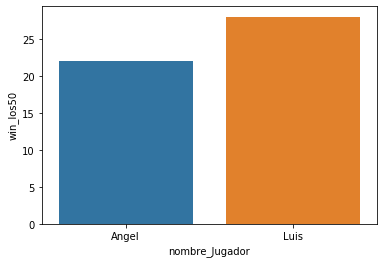

In [32]:
ax1 = sns.barplot(x="nombre_Jugador", y="win_los50", data=df_t)

In [35]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nombre_Jugador  2 non-null      object 
 1   win_los50       2 non-null      float64
 2   win_los100      2 non-null      float64
 3   win_los150      2 non-null      float64
dtypes: float64(3), object(1)
memory usage: 192.0+ bytes


In [41]:
subject=['win_los50', 'win_los100', 'win_los150']
dataset=df_t.groupby('nombre_Jugador')[subject].mean()
#print(dataset)
x=np.arange(len(subject))
width = 0.35  # the width of the bars
score_label=np.arange(0,110,10)
print(dataset.T)
jugador1_datos=list(dataset.T[jug1])
jugador2_datos=list(dataset.T[jug2])

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, jugador1_datos, width, label=jug1)
rects2 = ax.bar(x + width/2, jugador2_datos, width, label=jug2)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(subject)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


nombre_Jugador  Angel  Luis
win_los50        22.0  28.0
win_los100       49.0  51.0
win_los150       72.0  78.0


In [ ]:
labels=['50','100','150']
angel = [TG1_jg50, TG1_jg100,TG1_jg150]
luis = [TG2_jg50, TG2_jg100,TG2_jg150]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, angel, width, label='Angel')
rects2 = ax.bar(x + width/2, luis, width, label='Luis')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ganancias')
ax.set_title('Comparativa de Ganacias entre %s  y %s ' %(jug1,jug2))
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()